In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [283]:
df = pd.read_excel(r'C:\Users\AKHIL\Downloads\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\Flight_Ticket_Participant_Datasets\Data_Train.xlsx')

In [284]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [285]:
df.shape

(10683, 11)

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Total stops and route has one null value in each

In [287]:
df['Date'] = pd.to_datetime(df['Date_of_Journey'],dayfirst=True)

In [288]:
df['Date'].dtype

dtype('<M8[ns]')

We will take weekday, months and year into consideration

In [289]:
Day = []
Month = []
Year = []

for i in df['Date']:
    Day.append(i.dayofweek)
    Month.append(i.month)
    Year.append(i.year)

In [290]:
df['Day'] = Day
df['Month'] = Month
df['Year'] = Year

In [291]:
df['Day'][:5]

0    6
1    2
2    6
3    6
4    4
Name: Day, dtype: int64

In [292]:
df['Month'][:5]

0    3
1    5
2    6
3    5
4    3
Name: Month, dtype: int64

In [293]:
df['Year'][:5]

0    2019
1    2019
2    2019
3    2019
4    2019
Name: Year, dtype: int64

In [294]:
df['Day'].unique()

array([6, 2, 4, 0, 1, 5, 3], dtype=int64)

In [295]:
df['Year'].unique()

array([2019], dtype=int64)

since, year has only one value, we can drop it

In [296]:
df['Month'].unique()

array([3, 5, 6, 4], dtype=int64)

Only few months data is available.

In [297]:
df.drop(columns = ['Date_of_Journey','Date','Year'],inplace=True)

In [298]:
df.shape

(10683, 12)

In [299]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,6,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,6,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,4,3


only four months of data is available

In [300]:
df = df.dropna()

In [301]:
df.shape

(10682, 12)

In [302]:
df['Ar_time'] = pd.to_datetime(df['Arrival_Time'])

In [303]:
df['Ar_time'][0:10]

0   2021-03-22 01:10:00
1   2021-05-22 13:15:00
2   2021-06-10 04:25:00
3   2021-05-22 23:30:00
4   2021-05-22 21:35:00
5   2021-05-22 11:25:00
6   2021-03-13 10:25:00
7   2021-03-02 05:05:00
8   2021-03-13 10:25:00
9   2021-05-22 19:15:00
Name: Ar_time, dtype: datetime64[ns]

In [304]:
df['Dp_time'] = pd.to_datetime(df['Dep_Time'])
    

In [305]:
df['Dp_time'][0:10]

0   2021-05-22 22:20:00
1   2021-05-22 05:50:00
2   2021-05-22 09:25:00
3   2021-05-22 18:05:00
4   2021-05-22 16:50:00
5   2021-05-22 09:00:00
6   2021-05-22 18:55:00
7   2021-05-22 08:00:00
8   2021-05-22 08:55:00
9   2021-05-22 11:25:00
Name: Dp_time, dtype: datetime64[ns]

We will take only start and end hours from th above columns into consideration

In [306]:
Ar_hr = []
Dp_hr = []

for i in df['Ar_time']:
    Ar_hr.append(i.hour)
for i in df['Dp_time']:
    Dp_hr.append(i.hour)

In [307]:
df['Ar_hr'] = Ar_hr
df['Dp_hr'] = Dp_hr

In [308]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Ar_time,Dp_time,Ar_hr,Dp_hr
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,6,3,2021-03-22 01:10:00,2021-05-22 22:20:00,1,22
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2,5,2021-05-22 13:15:00,2021-05-22 05:50:00,13,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,6,2021-06-10 04:25:00,2021-05-22 09:25:00,4,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,6,5,2021-05-22 23:30:00,2021-05-22 18:05:00,23,18
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,4,3,2021-05-22 21:35:00,2021-05-22 16:50:00,21,16


In [309]:
df.drop(columns = ['Dep_Time','Arrival_Time','Ar_time','Dp_time'],inplace=True)

In [310]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Ar_hr,Dp_hr
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,6,3,1,22
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2,5,13,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,6,4,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,6,5,23,18
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,4,3,21,16


In [311]:
df['Total_Stops'] = df['Total_Stops'].map({
    'non-stop':0,
    '1 stop':1,
    '2 stops':2,
    '3 stops':3,
    '4 stops':4
})

In [312]:
df['Total_Stops'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [313]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Ar_hr,Dp_hr
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,6,3,1,22
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,2,5,13,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,6,6,4,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,6,5,23,18
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,4,3,21,16


In [314]:
dur = []

for i in df['Duration']:
    dur.append(i.replace('h',','))
    


In [315]:
dur[0:5]

['2, 50m', '7, 25m', '19,', '5, 25m', '4, 45m']

In [316]:
dur1 = []

for i in dur:
    dur1.append(i.split(','))

when splitting the duration into hours and minutes, noticed that there is a one specific row with duration as 5m, which is practically impossible. Hence, we will remove this row at the end of data cleaning.

For now lets add 0 as hours in it.

In [317]:
dur1[6474:6475]

[['5m']]

In [318]:
dur1[6474:6475] =[['0','5m']]

In [319]:
dur1[6474:6475]

[['0', '5m']]

In [320]:
hour = []
mi = []

for i in range(len(dur1)):
    hour.append(int(dur1[i][0]))
    mi.append(dur1[i][1].replace('m',''))
    

In [321]:
mi[0 : 10]

[' 50', ' 25', '', ' 25', ' 45', ' 25', ' 30', ' 5', ' 30', ' 50']

In [322]:
for i in range(len(mi)):
    if mi[i] == '':
        mi[i]= '0'

In [323]:
mi[0 : 10]

[' 50', ' 25', '0', ' 25', ' 45', ' 25', ' 30', ' 5', ' 30', ' 50']

In [324]:
for i in range(len(mi)):
    mi[i]=int(mi[i].replace(' ',''))

In [325]:
hour[0:10]

[2, 7, 19, 5, 4, 2, 15, 21, 25, 7]

In [326]:
total_time = []
for i in range(len(hour)):
    total_time.append((hour[i]*60)+mi[i])
    

In [327]:
df['total_time'] = total_time

In [328]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Ar_hr,Dp_hr,total_time
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,6,3,1,22,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,2,5,13,5,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,6,6,4,9,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,6,5,23,18,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,4,3,21,16,285


In [329]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [330]:
df['Additional_Info'] = df['Additional_Info'].str.replace('No info','No Info')

In [331]:
df['Additional_Info'].unique()

array(['No Info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [332]:
len(df['Additional_Info'].unique())

9

The above length is just to cross check with the count of unique values available in testing dataset.

If there are differences when we add dummies in testing dataset, the model will not allow us to predict as one or more columns may be missing.

In [333]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Ar_hr,Dp_hr,total_time
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No Info,3897,6,3,1,22,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No Info,7662,2,5,13,5,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No Info,13882,6,6,4,9,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No Info,6218,6,5,23,18,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No Info,13302,4,3,21,16,285


In [334]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Ar_hr,Dp_hr,total_time
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No Info,3897,6,3,1,22,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No Info,7662,2,5,13,5,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No Info,13882,6,6,4,9,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No Info,6218,6,5,23,18,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No Info,13302,4,3,21,16,285


In [335]:
df.drop(columns= ['Route','Duration'],inplace = True)

In [336]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Ar_hr,Dp_hr,total_time
0,IndiGo,Banglore,New Delhi,0,No Info,3897,6,3,1,22,170
1,Air India,Kolkata,Banglore,2,No Info,7662,2,5,13,5,445
2,Jet Airways,Delhi,Cochin,2,No Info,13882,6,6,4,9,1140
3,IndiGo,Kolkata,Banglore,1,No Info,6218,6,5,23,18,325
4,IndiGo,Banglore,New Delhi,1,No Info,13302,4,3,21,16,285


In [337]:
len(df['Airline'].unique())

12

In [338]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [339]:
len(df['Source'].unique())

5

In [340]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [341]:
len(df['Destination'].unique())

6

In [342]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

Add_info has 9 

Airline has 12

Source has 5

Destination has 6

In [343]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Ar_hr,Dp_hr,total_time
0,IndiGo,Banglore,New Delhi,0,No Info,3897,6,3,1,22,170
1,Air India,Kolkata,Banglore,2,No Info,7662,2,5,13,5,445
2,Jet Airways,Delhi,Cochin,2,No Info,13882,6,6,4,9,1140
3,IndiGo,Kolkata,Banglore,1,No Info,6218,6,5,23,18,325
4,IndiGo,Banglore,New Delhi,1,No Info,13302,4,3,21,16,285


Since, our dataset has been cleaned, lets analyse the data

<AxesSubplot:>

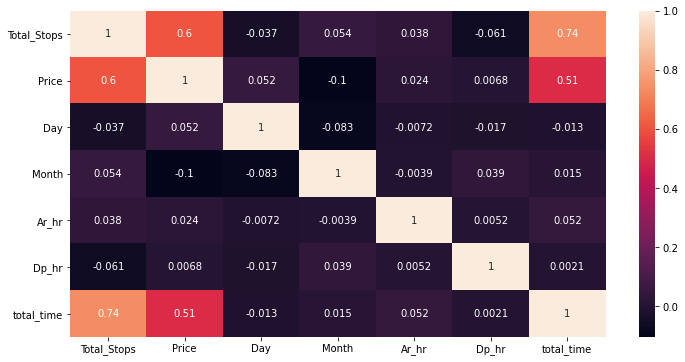

In [344]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

The duration and no.of stops are correlated with price

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

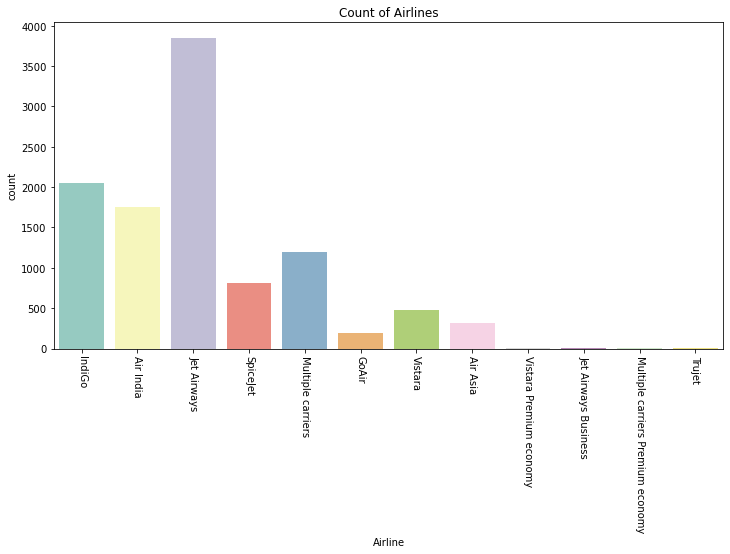

In [345]:
plt.figure(figsize=(12,6))
sns.countplot(df['Airline'], palette='Set3')
plt.title('Count of Airlines')
plt.xticks(rotation=270)


trujet, vistara premium, jet airways business, multiple carriers business has very low count

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


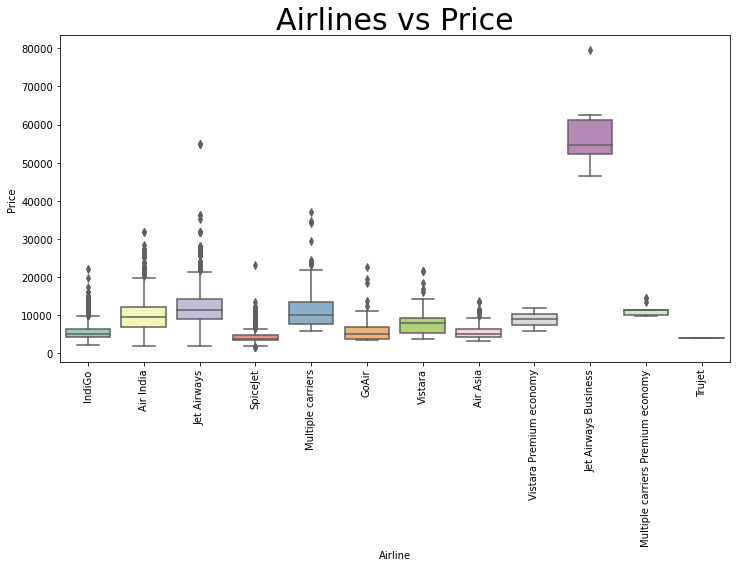

In [346]:
plt.figure(figsize=(12,6))
sns.boxplot(df['Airline'], df['Price'], palette='Set3')
plt.title('Airlines vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

There are outliers for every airline

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Banglore'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Chennai'),
  Text(4, 0, 'Mumbai')])

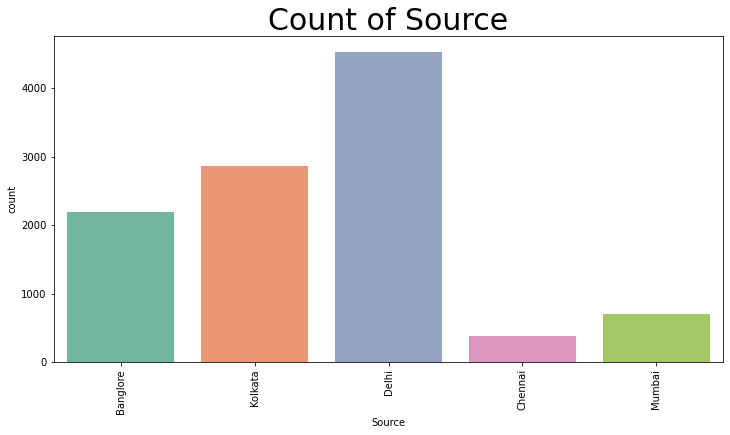

In [347]:
plt.figure(figsize=(12,6))
sns.countplot(df['Source'], palette='Set2')
plt.title('Count of Source', size=30)
plt.xticks(rotation=90)

Delhi has high number of flight bookings from

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Banglore'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Chennai'),
  Text(4, 0, 'Mumbai')])

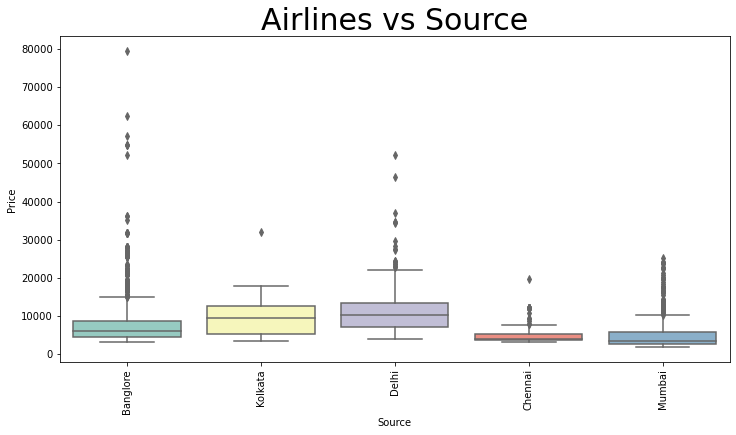

In [348]:
plt.figure(figsize=(12,6))
sns.boxplot(df['Source'], df['Price'], palette='Set3')
plt.title('Airlines vs Source', size=30)
plt.xticks(rotation=90)

The highest price is from bangalore

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'New Delhi'),
  Text(1, 0, 'Banglore'),
  Text(2, 0, 'Cochin'),
  Text(3, 0, 'Kolkata'),
  Text(4, 0, 'Delhi'),
  Text(5, 0, 'Hyderabad')])

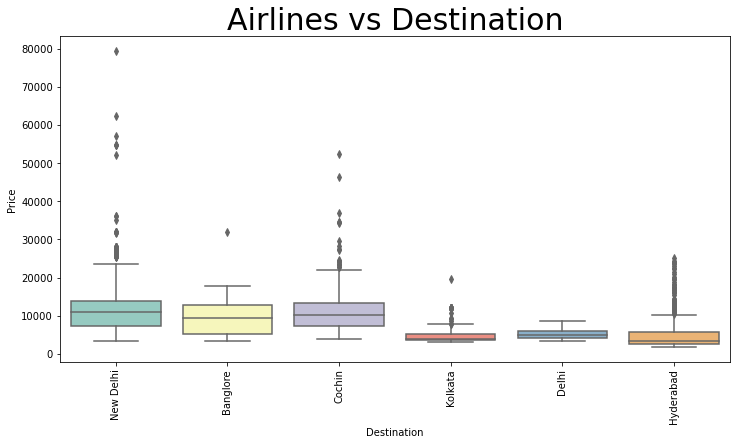

In [349]:
plt.figure(figsize=(12,6))
sns.boxplot(df['Destination'], df['Price'], palette='Set3')
plt.title('Airlines vs Destination', size=30)
plt.xticks(rotation=90)

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6')])

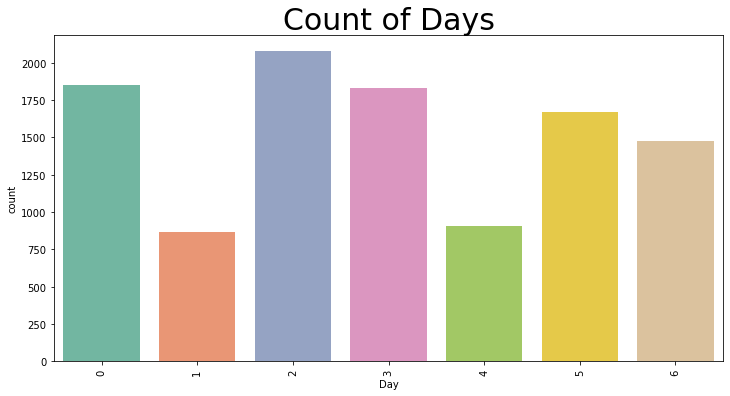

In [350]:
plt.figure(figsize=(12,6))
sns.countplot(df['Day'], palette='Set2')
plt.title('Count of Days', size=30)
plt.xticks(rotation=90)

The most no of flights were on wedsday, followed by monday and thursday

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

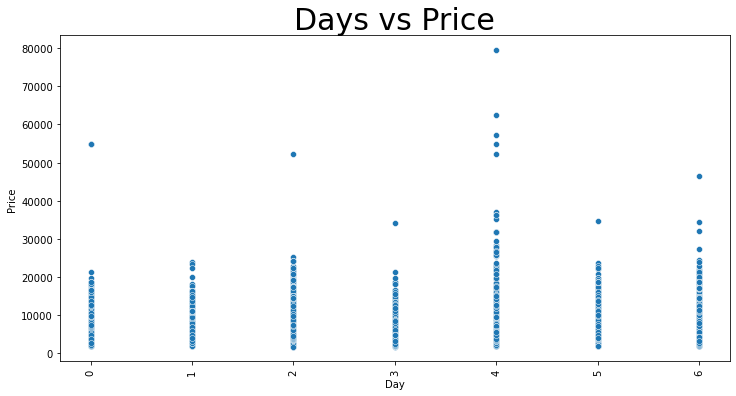

In [351]:
plt.figure(figsize=(12,6))
sns.scatterplot(df['Day'], df['Price'], palette='Set2')
plt.title('Days vs Price', size=30)
plt.xticks(rotation=90)


friday has the highest price,

we can notice that, each day has atleast one farther value

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3]),
 [Text(0, 0, '3'), Text(1, 0, '4'), Text(2, 0, '5'), Text(3, 0, '6')])

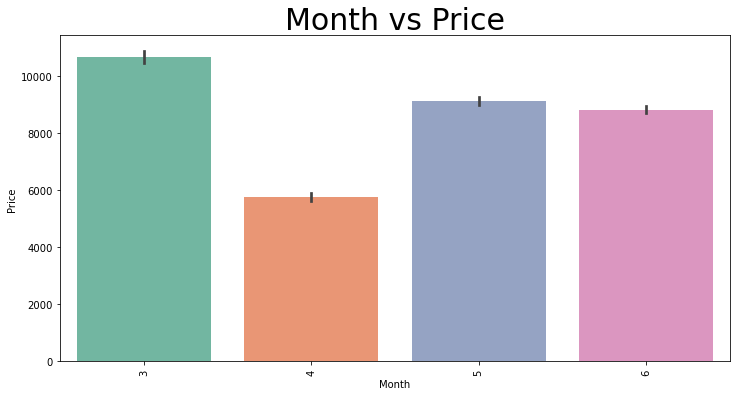

In [352]:
plt.figure(figsize=(12,6))
sns.barplot(df['Month'], df['Price'], palette='Set2')
plt.title('Month vs Price', size=30)
plt.xticks(rotation=90)

March has higher prices

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_time', ylabel='Price'>

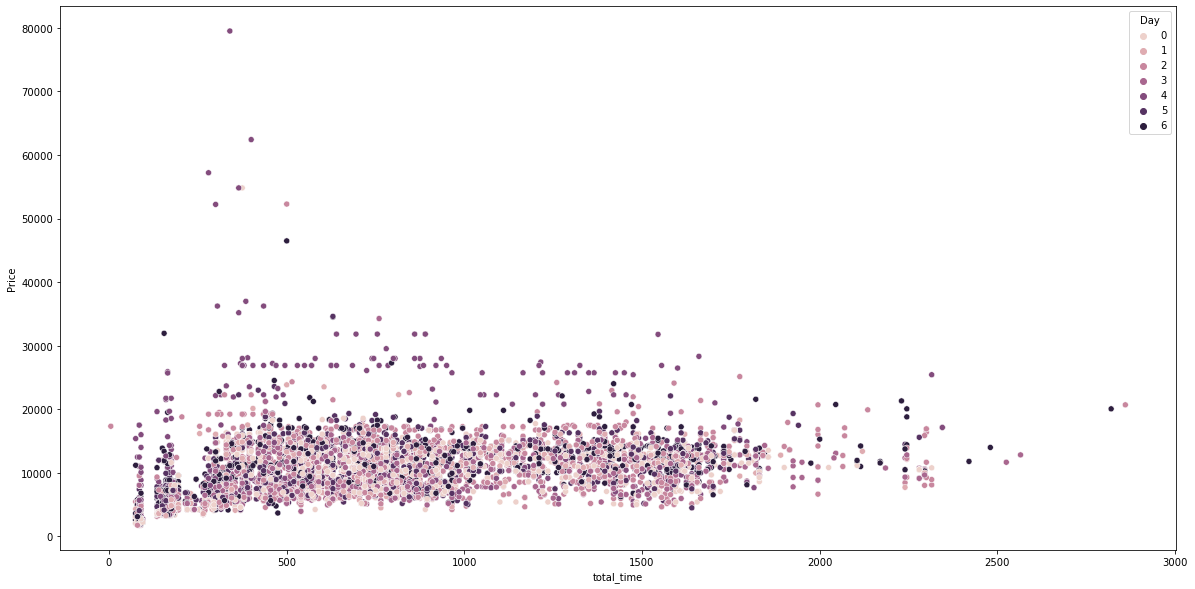

In [353]:
plt.figure(figsize = (20,10))
sns.scatterplot(df['total_time'],df['Price'],hue=df['Day'])

Though, it looks like there is no positive correlation betweem them.

We can see that, lesser the total time of journey, the price may increase.

Most of the data is present in price (0,20000) and journey time (0,2000) minutes

In [354]:
dummies = pd.get_dummies(df[['Airline', 'Source', 'Destination','Additional_Info']])

In [355]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'Day', 'Month', 'Ar_hr', 'Dp_hr', 'total_time'],
      dtype='object')

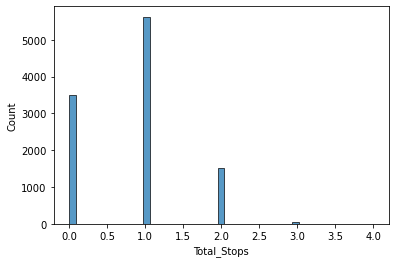

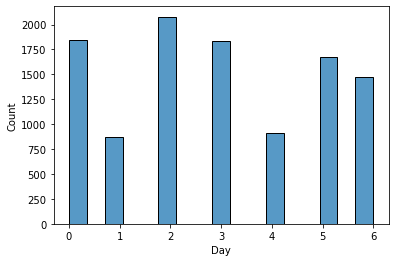

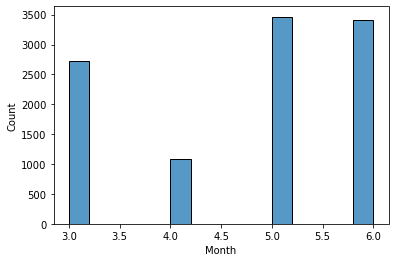

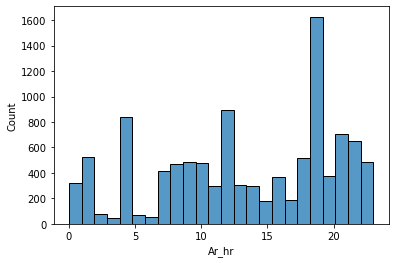

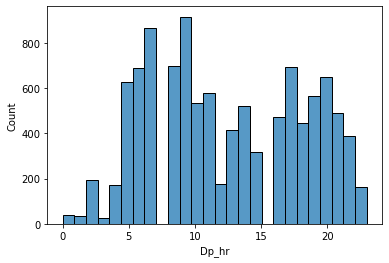

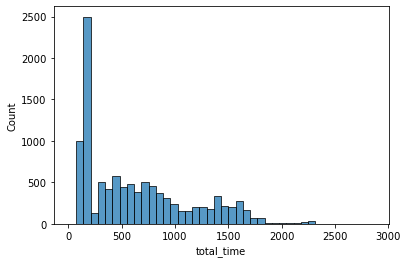

In [356]:
cols = ['Total_Stops', 'Day', 'Month', 'Ar_hr', 'Dp_hr', 'total_time']

for i in cols:
    plt.subplots()
    sns.histplot(df[i])

In [357]:
df.skew()

Total_Stops    0.317109
Price          1.812405
Day            0.040404
Month         -0.387409
Ar_hr         -0.370146
Dp_hr          0.112924
total_time     0.861411
dtype: float64

Though the skewness is under acceptable range, the data is not normalised, so the predictions will not be good.

We arent removing outliers based on time of arrivals or departures, as aeroplanes do work 24 /7... so every data point is needed.

In [358]:
df.loc[6474]

Airline            Air India
Source                Mumbai
Destination        Hyderabad
Total_Stops                2
Additional_Info      No Info
Price                  17327
Day                        2
Month                      3
Ar_hr                     16
Dp_hr                     16
total_time                 5
Name: 6474, dtype: object

In [359]:
df.drop(index = 6474,inplace=True)

In [360]:
copy = pd.concat([df,dummies],axis =1)

In [361]:
copy.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Ar_hr,Dp_hr,...,Destination_New Delhi,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight
0,IndiGo,Banglore,New Delhi,0.0,No Info,3897.0,6.0,3.0,1.0,22.0,...,1,0,0,0,0,0,0,1,0,0
1,Air India,Kolkata,Banglore,2.0,No Info,7662.0,2.0,5.0,13.0,5.0,...,0,0,0,0,0,0,0,1,0,0
2,Jet Airways,Delhi,Cochin,2.0,No Info,13882.0,6.0,6.0,4.0,9.0,...,0,0,0,0,0,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,1.0,No Info,6218.0,6.0,5.0,23.0,18.0,...,0,0,0,0,0,0,0,1,0,0
4,IndiGo,Banglore,New Delhi,1.0,No Info,13302.0,4.0,3.0,21.0,16.0,...,1,0,0,0,0,0,0,1,0,0


In [362]:
copy.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'Day', 'Month', 'Ar_hr', 'Dp_hr', 'total_time',
       'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Additional_Info_1 Long layover',
       'Additional_Info_1 Short layover', 'Additional_Info_2 Long layover',
       'Additional_Info_Business class', 'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No Info

In [363]:
copy.drop(columns=['Airline', 'Source', 'Destination','Additional_Info'],inplace = True)

Our training data set has been cleaned and feature engineered.

In [364]:
copy.head()

,Total_Stops,Price,Day,Month,Ar_hr,Dp_hr,total_time,Airline_Air Asia,Airline_Air India,Airline_GoAir,...,Destination_New Delhi,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight
0,0.0,3897.0,6.0,3.0,1.0,22.0,170.0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,2.0,7662.0,2.0,5.0,13.0,5.0,445.0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,2.0,13882.0,6.0,6.0,4.0,9.0,1140.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.0,6218.0,6.0,5.0,23.0,18.0,325.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1.0,13302.0,4.0,3.0,21.0,16.0,285.0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


The data is not normally distributed, so regression models would be affected.



In [365]:
copy.isnull().sum()

Total_Stops                                     1
Price                                           1
Day                                             1
Month                                           1
Ar_hr                                           1
Dp_hr                                           1
total_time                                      1
Airline_Air Asia                                0
Airline_Air India                               0
Airline_GoAir                                   0
Airline_IndiGo                                  0
Airline_Jet Airways                             0
Airline_Jet Airways Business                    0
Airline_Multiple carriers                       0
Airline_Multiple carriers Premium economy       0
Airline_SpiceJet                                0
Airline_Trujet                                  0
Airline_Vistara                                 0
Airline_Vistara Premium economy                 0
Source_Banglore                                 0


In [366]:
copy.dropna(inplace=True)

In [367]:
X = copy.drop(columns=['Price'])
Y = copy.Price

In [368]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaledX = scaler.fit_transform(X)

In [369]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(scaledX,Y,test_size = 0.3,random_state = 1) 

In [370]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(xtrain,ytrain)

predlr = lr.predict(xtest)

from sklearn.metrics import r2_score, mean_squared_error

print(r2_score(ytest,predlr))
print(mean_squared_error(ytest,predlr))

-6.718094609033261e+18
1.3441256417486332e+26


The metrics for linear regression are not as desired

In [371]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(xtrain,ytrain)

predrf = rf.predict(xtest)

from sklearn.metrics import r2_score, mean_squared_error

print(r2_score(ytest,predrf))
print(mean_squared_error(ytest,predrf))

0.8279114211277904
3443069.5751619455


The r2 score has a better value. 0.82

In [372]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1)

ridge.fit(xtrain,ytrain)

predr = ridge.predict(xtest)

from sklearn.metrics import r2_score, mean_squared_error

print(r2_score(ytest,predr))
print(mean_squared_error(ytest,predr))

0.6675269273662123
6651969.168715488


In [373]:
from sklearn.linear_model import Lasso

lasso = Lasso()

lasso.fit(xtrain,ytrain)

predl = lasso.predict(xtest)

from sklearn.metrics import r2_score, mean_squared_error

print(r2_score(ytest,predl))
print(mean_squared_error(ytest,predl))

0.6680543784728945
6641416.168221762


C:\Users\AKHIL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 302908654.13991547, tolerance: 16295370.845213752
  model = cd_fast.enet_coordinate_descent(


For ridge and lasso, the sqaured error is too almost the double for random forest regressor

In [374]:
from sklearn.model_selection import cross_val_score

cvs1 = cross_val_score(lr,xtest,ytest,cv=5,scoring='r2').mean()
cvs2 = cross_val_score(rf,xtest,ytest,cv=5,scoring='r2').mean()
cvs3 = cross_val_score(ridge,xtest,ytest,cv=5,scoring='r2').mean()
cvs4 = cross_val_score(lasso,xtest,ytest,cv=5,scoring='r2').mean()

C:\Users\AKHIL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 117175328.3388176, tolerance: 5078160.568707137
  model = cd_fast.enet_coordinate_descent(
C:\Users\AKHIL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 97937143.73505974, tolerance: 5015907.1725961
  model = cd_fast.enet_coordinate_descent(
C:\Users\AKHIL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102092687.18405533, tolerance: 5132978.006615445
  model = cd_fast.enet_coordinate_descent(
C:\Users\AKHIL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

In [375]:
print(cvs1, cvs2, cvs3, cvs4)

-4.203929311167962e+22 0.7791217754281006 0.6474093709267 0.6472115275219915


Random forest regressor has a difference of 5,
ridge and lasso has a difference of 2

In [376]:
from sklearn.ensemble import AdaBoostRegressor

ar = AdaBoostRegressor()

ar.fit(xtrain,ytrain)

predar = rf.predict(xtest)

from sklearn.metrics import r2_score, mean_squared_error

print(r2_score(ytest,predar))
print(mean_squared_error(ytest,predar))

0.8279114211277904
3443069.5751619455


Adaboost and randomforest has same r2 score and mean squared error

In [377]:
cvs5 = cross_val_score(ar,xtest,ytest,cv=5).mean()
print(cvs5)

0.3208252282809285


The difference is very high, will not consider adaboost technique

In [378]:
from sklearn.model_selection import GridSearchCV

alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)

GCV = GridSearchCV(ridge,param_grid = param_grid, cv=5)

GCV.fit(xtrain,ytrain)

print(r2_score(ytest,GCV.predict(xtest)))

GCV.best_params_

0.667662053738836


{'alpha': 100}

In [379]:
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)

GCV = GridSearchCV(lasso,param_grid = param_grid, cv=5)

GCV.fit(xtrain,ytrain)

print(r2_score(ytest,GCV.predict(xtest)))

GCV.best_params_

C:\Users\AKHIL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1310595844.7034569, tolerance: 13232436.131590368
  model = cd_fast.enet_coordinate_descent(
C:\Users\AKHIL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1322407773.0222244, tolerance: 12674135.290072965
  model = cd_fast.enet_coordinate_descent(
C:\Users\AKHIL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1289711839.8272972, tolerance: 12849820.545444809
  model = cd_fast.enet_coordinate_descent(
C:\Users\AKHIL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

0.6679990232063251


{'alpha': 10}

Though, the differences for lasso and ridge is less with cross val

the random forest regressor has high r2 score and even cross val score

Lets, proceed with random forest regressor

In [380]:
import pickle

filename = 'flightprice.pkl'

pickle.dump(rf,open(filename,'wb'))

1. null values
2. day and month
3. arrival hour
4. departure hour
5. Total stops
6. Duration
7. additional info

In [381]:
df1 = pd.read_excel(r'C:\Users\AKHIL\Downloads\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\Flight_Ticket_Participant_Datasets\Test_set.xlsx')

In [382]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [383]:
len(df1['Airline'].unique())

11

In [384]:
df1['Airline'].unique()

array(['Jet Airways', 'IndiGo', 'Multiple carriers', 'Air Asia',
       'Air India', 'Vistara', 'SpiceJet', 'Vistara Premium economy',
       'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business'], dtype=object)

 In training dataset - 'IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'
       
 
 Trujet is missing in the testing data set

In [385]:
len(df1['Source'].unique())

5

In [386]:
df1['Source'].unique()

array(['Delhi', 'Kolkata', 'Banglore', 'Mumbai', 'Chennai'], dtype=object)

training data set source has ['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai']

same values

In [387]:
df1['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Long layover', 'Business class',
       'Change airports'], dtype=object)

In [388]:
len(df1['Additional_Info'].unique())

6

training data set contains : ['No Info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover']
       
     
1 short layover, Red eye flight, 2 Long layover are missing from testing data set

In [389]:
len(df1['Destination'].unique())

6

In [390]:
df1['Destination'].unique()

array(['Cochin', 'Banglore', 'Delhi', 'New Delhi', 'Hyderabad', 'Kolkata'],
      dtype=object)

Training data set has - ['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad']

There are same number of unique values

In [391]:
df1['Total_Stops'].unique()

array(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'],
      dtype=object)

same as in training data set

change df to df1 in below code before starting to run

In [392]:
df1.info()

df1['Date'] = pd.to_datetime(df1['Date_of_Journey'],dayfirst=True)

df1['Date'].dtype

Day = []
Month = []
Year = []

for i in df1['Date']:
    Day.append(i.dayofweek)
    Month.append(i.month)
    Year.append(i.year)
    
df1['Day'] = Day
df1['Month'] = Month
df1['Year'] = Year

print(df1['Day'].unique())

print(df1['Month'].unique())

print(df1['Year'].unique())

df1.drop(columns = ['Date_of_Journey','Date','Year'],inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
[3 6 1 0 2 4 5]
[6 5 3 4]
[2019]


In [393]:
df1.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day,Month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,3,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,6,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,1,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,1,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,0,6


The date column has been changed.

In [394]:
df1['Ar_time'] = pd.to_datetime(df1['Arrival_Time'])

print(df1['Ar_time'][0:5])

df1['Dp_time'] = pd.to_datetime(df1['Dep_Time'])

print(df1['Dp_time'][0:5])

Ar_hr = []
Dp_hr = []

for i in df1['Ar_time']:
    Ar_hr.append(i.hour)
for i in df1['Dp_time']:
    Dp_hr.append(i.hour)
    
df1['Ar_hr'] = Ar_hr
df1['Dp_hr'] = Dp_hr

df1.drop(columns = ['Dep_Time','Arrival_Time','Ar_time','Dp_time'],inplace=True)

0   2021-06-07 04:25:00
1   2021-05-22 10:20:00
2   2021-05-22 19:00:00
3   2021-05-22 21:00:00
4   2021-06-25 02:45:00
Name: Ar_time, dtype: datetime64[ns]
0   2021-05-22 17:30:00
1   2021-05-22 06:20:00
2   2021-05-22 19:15:00
3   2021-05-22 08:00:00
4   2021-05-22 23:55:00
Name: Dp_time, dtype: datetime64[ns]


The time columns have been changed

In [395]:
df1.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Day,Month,Ar_hr,Dp_hr
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,3,6,4,17
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,6,5,10,6
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,1,5,19,19
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,1,5,21,8
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,0,6,2,23


In [396]:
df1['Total_Stops'] = df1['Total_Stops'].map({
    'non-stop':0,
    '1 stop':1,
    '2 stops':2,
    '3 stops':3,
    '4 stops':4
})

df1['Total_Stops'].unique()

array([1, 0, 2, 3, 4], dtype=int64)

Total stops has been encoded

In [397]:
df1.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Day,Month,Ar_hr,Dp_hr
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1,No info,3,6,4,17
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1,No info,6,5,10,6
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1,In-flight meal not included,1,5,19,19
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1,No info,1,5,21,8
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,0,No info,0,6,2,23


In [398]:
dur = []

for i in df1['Duration']:
    dur.append(i.replace('h',','))

print(dur[0:5])

dur1 = []

for i in dur:
    dur1.append(i.split(','))
    



['10, 55m', '4,', '23, 45m', '13,', '2, 50m']


In [399]:
dur1[0:5]

[['10', ' 55m'], ['4', ''], ['23', ' 45m'], ['13', ''], ['2', ' 50m']]

In [400]:
k =0 
for i in dur1:
    if len(i) == 1:
        print(k)
    k+=1   

2660


In [401]:
dur1[2660] = ['0','5m']

In [402]:
dur1[2658 : 2661]

[['21', ' 10m'], ['7', ' 5m'], ['0', '5m']]

In [403]:
hour = []
mi = []

for i in range(len(dur1)):
    hour.append(int(dur1[i][0]))
    mi.append(dur1[i][1].replace('m',''))
    
for i in range(len(mi)):
    if mi[i] == '':
        mi[i]= '0'

for i in range(len(mi)):
    mi[i]=int(mi[i].replace(' ',''))
    
print(mi[0 : 5])

print(hour[0:10])

total_time = []
for i in range(len(hour)):
    total_time.append((hour[i]*60)+mi[i])
    
df1['total_time'] = total_time

[55, 0, 45, 0, 50]
[10, 4, 23, 13, 2, 18, 15, 5, 2, 6]


duration has also been addressed

Before predicitng, we need to make sure the no of columns for training is matched by this testing data.

Since, there are few missing, we will add those values before getting dummies in rows.

after getting dummies, we will delete that rows after adding dummies to the dataset inorder to match the no of columns

In [404]:
df1['Additional_Info'] = df1['Additional_Info'].str.replace('No info','No Info')

1 Short layover

'Red-eye flight', '2 Long layover'


'Trujet' - we will add rows with these values and delete it later


In [405]:
df1.drop(columns= ['Route'],inplace = True)

In [406]:
len(df1)

2671

In [407]:
df1.head(1)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Day,Month,Ar_hr,Dp_hr,total_time
0,Jet Airways,Delhi,Cochin,10h 55m,1,No Info,3,6,4,17,655


In [408]:
df1.loc[2671] = ['Trujet','Delhi','Cochin','0','1','1 Short layover',3,6,4,17,655]
df1.loc[2672] = ['Trujet','Delhi','Cochin','0','1','Red-eye flight',3,6,4,17,655]
df1.loc[2673] = ['Trujet','Delhi','Cochin','0','1','2 Long layover',3,6,4,17,655]


In [409]:
len(df1)

2674

In [410]:
dummies = pd.get_dummies(df1[['Airline', 'Source', 'Destination','Additional_Info']])

In [411]:
copy2 = pd.concat([df1,dummies],axis=1)

In [412]:
copy2.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Day,Month,Ar_hr,Dp_hr,...,Destination_New Delhi,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight
0,Jet Airways,Delhi,Cochin,10h 55m,1,No Info,3,6,4,17,...,0,0,0,0,0,0,0,1,0,0
1,IndiGo,Kolkata,Banglore,4h,1,No Info,6,5,10,6,...,0,0,0,0,0,0,0,1,0,0
2,Jet Airways,Delhi,Cochin,23h 45m,1,In-flight meal not included,1,5,19,19,...,0,0,0,0,0,0,1,0,0,0
3,Multiple carriers,Delhi,Cochin,13h,1,No Info,1,5,21,8,...,0,0,0,0,0,0,0,1,0,0
4,Air Asia,Banglore,Delhi,2h 50m,0,No Info,0,6,2,23,...,0,0,0,0,0,0,0,1,0,0


In [413]:
copy2.drop(columns=['Airline', 'Source', 'Destination','Duration','Additional_Info'],inplace = True)

In [414]:
copy2.head()

,Total_Stops,Day,Month,Ar_hr,Dp_hr,total_time,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Destination_New Delhi,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight
0,1,3,6,4,17,655,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,6,5,10,6,240,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,1,1,5,19,19,1425,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,1,5,21,8,780,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,6,2,23,170,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [415]:
copy2.drop(index=[2671,2672,2673],inplace = True)

In [416]:
copy2.shape

(2671, 38)

In [417]:
scaledX1 = scaler.fit_transform(copy2)

In [418]:
predictions = pd.read_excel(r'C:\Users\AKHIL\Downloads\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\Flight_Ticket_Participant_Datasets\Sample_submission.xlsx')

In [419]:
pred = rf.predict(scaledX1)

In [422]:
print(r2_score(predictions,pred))

-5.611442860492477


In [423]:
print(mean_squared_error(predictions,pred))

165581215.51276


This regression model is predicting very poor

Lets check with ridge and lasso

In [424]:
ridge = Ridge(alpha=100) #based on parameter tuning

ridge.fit(xtrain,ytrain)

predr = ridge.predict(xtest)

from sklearn.metrics import r2_score, mean_squared_error

print(r2_score(ytest,predr))
print(mean_squared_error(ytest,predr))

0.667662053738836
6649265.622056947


In [425]:
pred = ridge.predict(scaledX1)

print(r2_score(predictions,pred))
print(mean_squared_error(predictions,pred))

-5.433607371074484
161127389.45383763


In [426]:
lasso = Lasso(alpha=10) #based on parameter tuning

lasso.fit(xtrain,ytrain)

predl = lasso.predict(xtest)

from sklearn.metrics import r2_score, mean_squared_error

print(r2_score(ytest,predl))
print(mean_squared_error(ytest,predl))

0.6679990232063251
6642523.691076558


In [427]:
pred = lasso.predict(scaledX1)

print(r2_score(predictions,pred))
print(mean_squared_error(predictions,pred))

-5.43415072826416
161140997.63979986


every model is performing very poor with the testing data provided though it has good accuracy score while training.

# Conclusion

We have cleaned the training data and testing data provided in the same way to erase the error which might generate due to different no.of columns while predicting using independent variable(X dataset).

We have trained models on linear regression, random forest regressor, ridge, lasso and adaboostregressor.

we have predicted the prices of test data using randomforest, ridge and lasso.

The model doesnt predict as expected for the testing data. It has a low r2_score and high mean squared error.

But the model when trained used training data set has a good r2_score for random forest model